# Exploring Cloud DA Forward Operator

shawn.s.murdzek@noaa.gov

In [1]:
import pyDA_utils.cloud_DA_forward_operator_viz as cfov
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Run observation operator
%run /mnt/lfs4/BMC/wrfruc/murdzek/src/pyDA_utils/cloud_DA_forward_operator.py /lfs4/BMC/wrfruc/murdzek/real_obs/decoded_bufr_for_cloudDA/202202012100.rap.prepbufr.csv /mnt/lfs4/BMC/wrfruc/murdzek/RRFS_Ens_Cloud_DA/Feb2022_retro/Ens_GDAS_SDLVDL_noGF_cloud1/v0.6.2/prod/rrfs_conus_3km_ensda.20220201/20/mem0001/rrfs.t20z.natlev.f001.conus_3km.grib2

start time: 20240606 17:04:19

reading in BUFR obs...
reading in model UPP output...


Identifying cloud obs...
Running ceilometer forward operator...
Creating ceilometer forward operator object
Interpolating model columns to obs locations...
sfc_cld_forward_operator: Starting interpolation of model output columns...
sfc_cld_forward_operator: Finished interpolating model output columns (elapsed time = 8.476657 s)
Imposing height limits and min cld fraction...
Adding clear obs and interpolating model clouds in column to ob heights...

Inside sfc_cld_forward_operator.add_clear_obs()...
amt_field = CLAM
clr_ob_locs = [ 250  750 1250 1750 2250 2750 3250]
0
mask = [ True False  True  True  True  True  True]
clear ob hgts = [ 250 1250 1750 2250 2750 3250]
data['HOCB'][i] = [ 250.  600. 1250. 1750. 2250. 2750. 3250.]
data[amt_field][i] = [0. 6. 0. 0. 0. 0. 0.]
1
mask = [ True False  True  True  True  True  True]
clear ob hgts = [ 250 1250 1750 2250 2750 3250]
data['HOCB'][i] = [ 250.  600. 1250. 1750. 2250. 2750. 3250.]
data[amt_field][i] = [0. 7. 0. 0. 0. 0. 0.]
2
mask = [ Tru

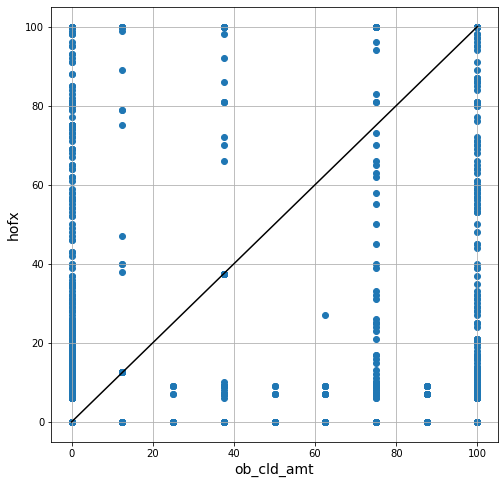

In [3]:
cld_hofx_viz = cfov.sfc_cld_forward_operator_viz(cld_hofx)
cld_hofx_viz.scatterplot()
plt.show()

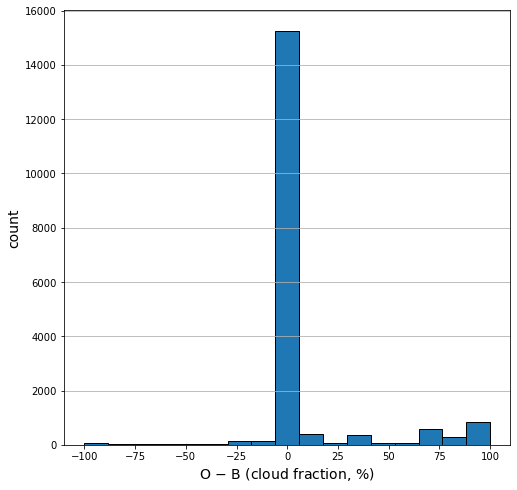

In [4]:
cld_hofx_viz.hist(plot_param={'field':'OmB', 'xlabel':'O $-$ B (cloud fraction, %)'})
plt.show()

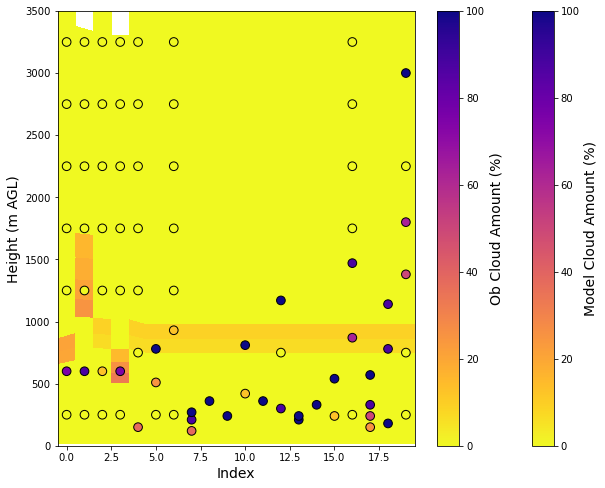

In [5]:
cld_hofx_viz.vert_columns(idx=list(range(20)))
plt.show()

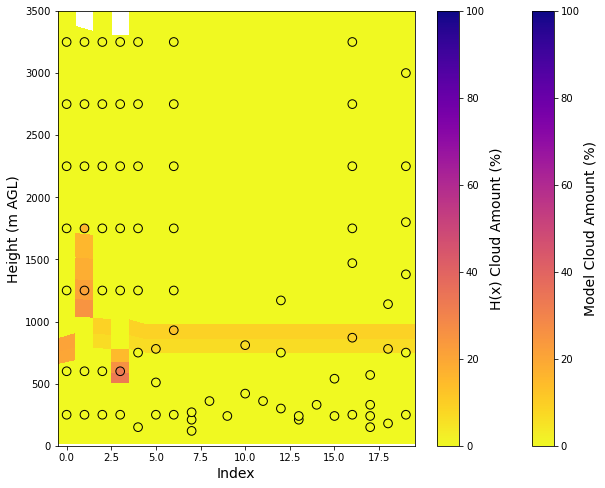

In [6]:
cld_hofx_viz.vert_columns(idx=list(range(20)),
                          pt_param={'field':'hofx', 
                                   'label':'H(x) Cloud Amount (%)', 
                                   'kwargs':{'vmin':0, 'vmax':100, 's':75, 'edgecolors':'k', 'cmap':'plasma_r'}})
plt.show()

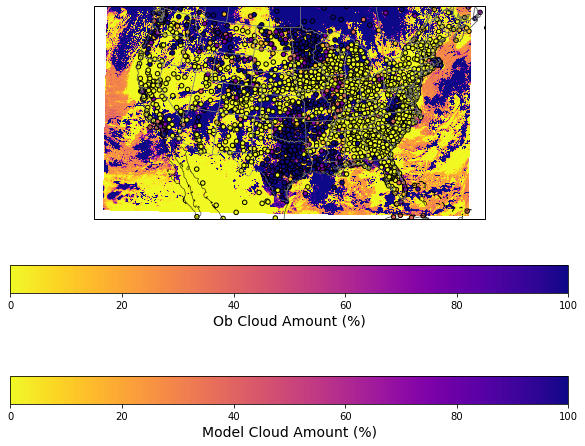

In [7]:
cld_hofx_viz.composite_cld_cover()
plt.show()